# Convolution
$$
f_3(t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(t-\tau) d\tau
$$
To visualize, compute integrand: $f_1(\tau)f_2(t-\tau)$ for each value of $\tau$

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from sympy.abc import t, x
init_printing(pretty_print=True)

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


In [2]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

In [3]:
# Two functions that are f_amp valued between f_min and f_max
f1min = 0
f1max = 3
f1amp = 2

f2min = 0
f2max = 2
f2amp = 2

f1 = Piecewise((0, t < f1min),(f1amp, t <= f1max),(0, True))
f2 = Piecewise((0, t < f2min),(f2amp, t <= f2max),(0, True))
f3 = convolve(f1, f2, t)
f3amp = f1amp*f2amp

In [4]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

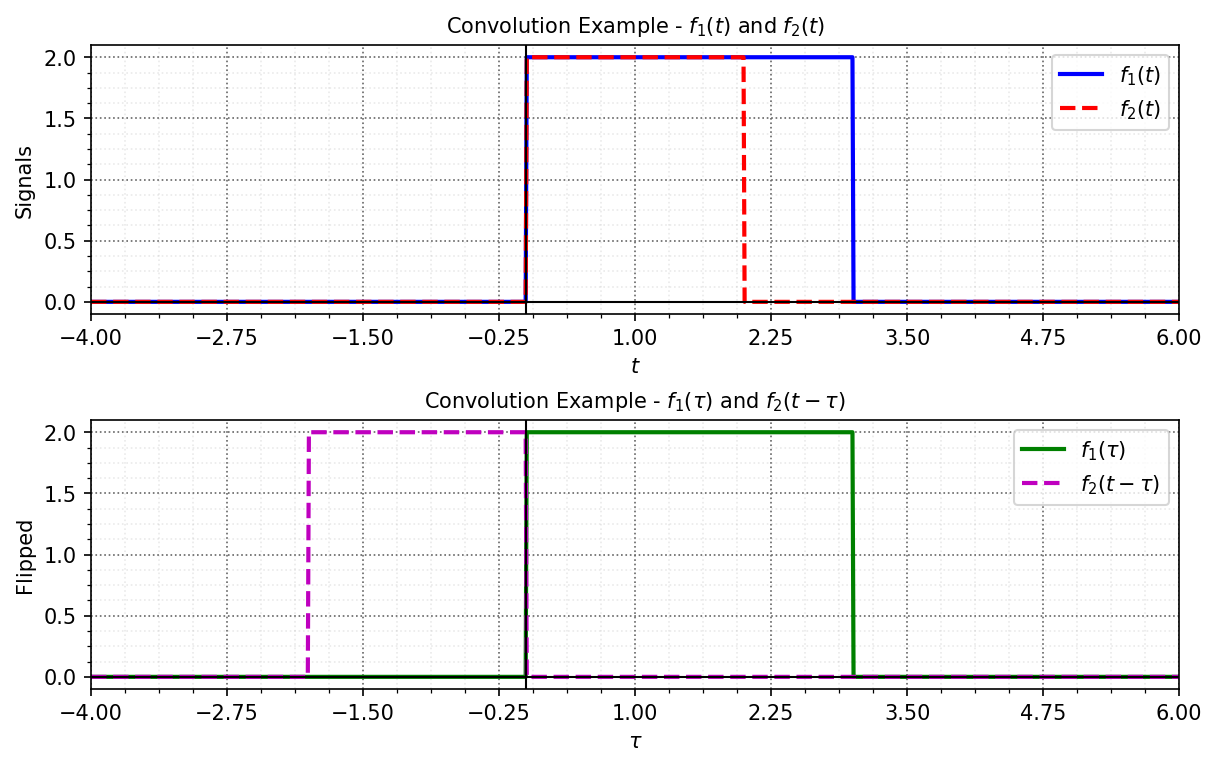

In [5]:
fig, axs = plt.subplots(2,figsize=(8, 5),constrained_layout = True)
axs[0].plot(tt_vals, lam_f1(tt_vals),'b-',lw=2,label='$f_1(t)$')
axs[0].plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
axs[1].plot(tt_vals, lam_f1(tt_vals),'g-',label=r'$f_1(\tau)$')
axs[1].plot(tt_vals, lam_f2(0-tt_vals),'m--',label=r'$f_2(t-\tau)$')
nicegrid(axs[0])
nicegrid(axs[1])
axs[0].legend()
axs[1].legend()
axs[0].set_ylabel("Signals")
axs[1].set_ylabel("Flipped")
axs[0].set_xlabel("$t$")
axs[1].set_xlabel(r"$\tau$")
axs[0].set_title(r"Convolution Example - $f_1(t)$ and $f_2(t)$")
axs[1].set_title(r"Convolution Example - $f_1(\tau)$ and $f_2(t-\tau)$")
plt.show()

In [6]:
def plot_functions(tval):
    plt.plot(tau_vals, lam_f1(tau_vals),'b-',lw=2,label=r'$f_1(\tau)$')
    if tval < 0:
        plt.plot(tau_vals, lam_f2(tval-tau_vals),'c-',label=r'$f_2(-(\tau+'+str(-tval)+'))$')
    else:
        plt.plot(tau_vals, lam_f2(tval-tau_vals),'c-',label=r'$f_2(-(\tau-'+str(tval)+'))$')
    if (tval >= f1min + f2min) & (tval <= f1max + f2max):
        plt.fill([max(f1min,tval-f2max),max(f1min,tval-f2max),min(tval-f2min,f1max),min(tval-f2min,f1max)],[0,f3amp,f3amp,0],'g',alpha=0.3,label=r'$f_2('+str(tval)+r' - \tau)f_1(\tau)$')

    nicegrid(axs)
    plt.legend()
    plt.xticks(np.arange(-6,6+1,1))
    plt.ylabel("Signal")
    plt.xlabel(r"$\tau$")
    plt.title('Convolution Example $t = $'+str(tval))
    plt.show()

### Approaching from left - still outside

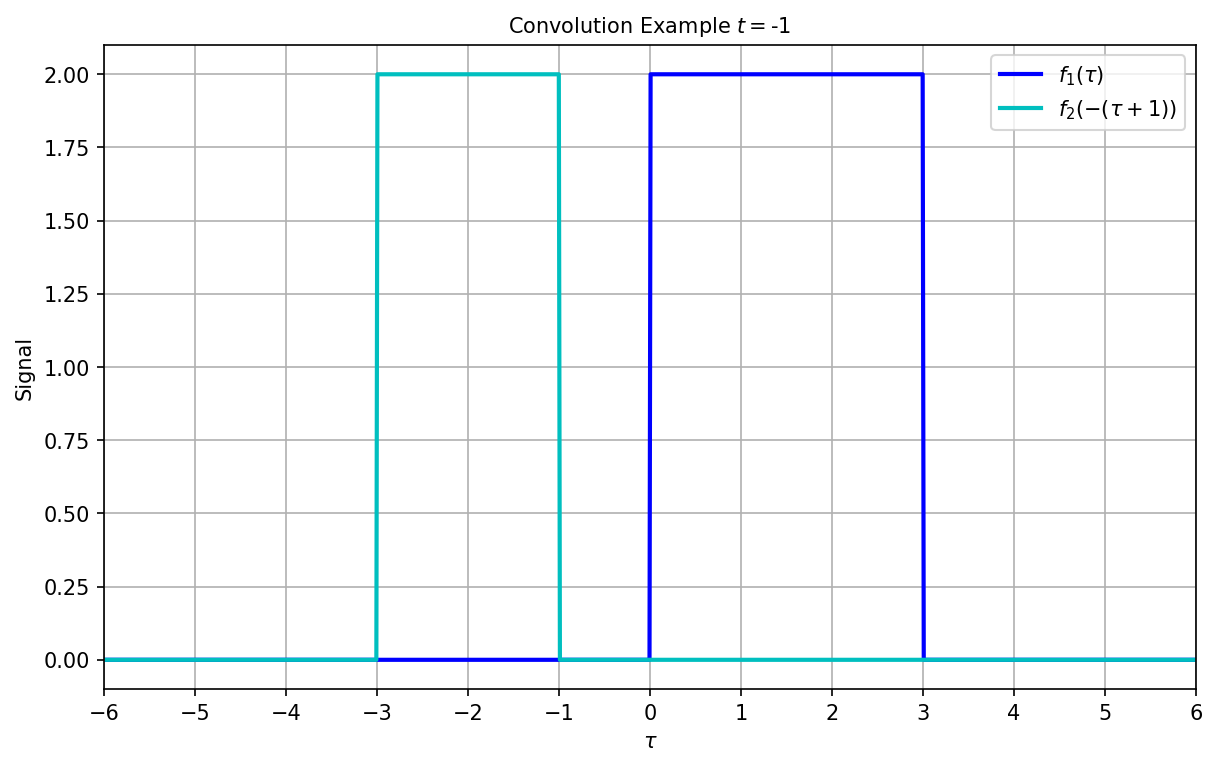

In [7]:
tval = f1min + f2min - 1
fig = plt.figure(1,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Approaching from left - overlapping

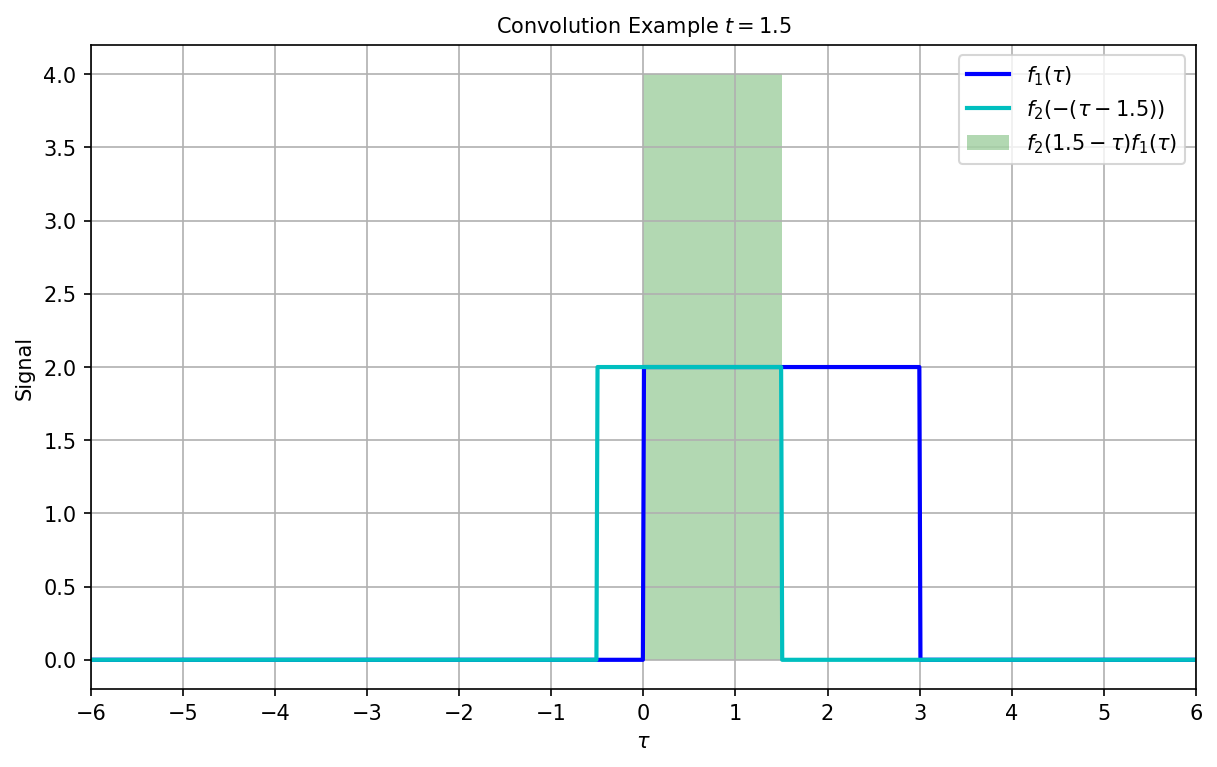

In [8]:
tval = f1min + f2max - 0.5
fig = plt.figure(2,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Approaching from left - inside

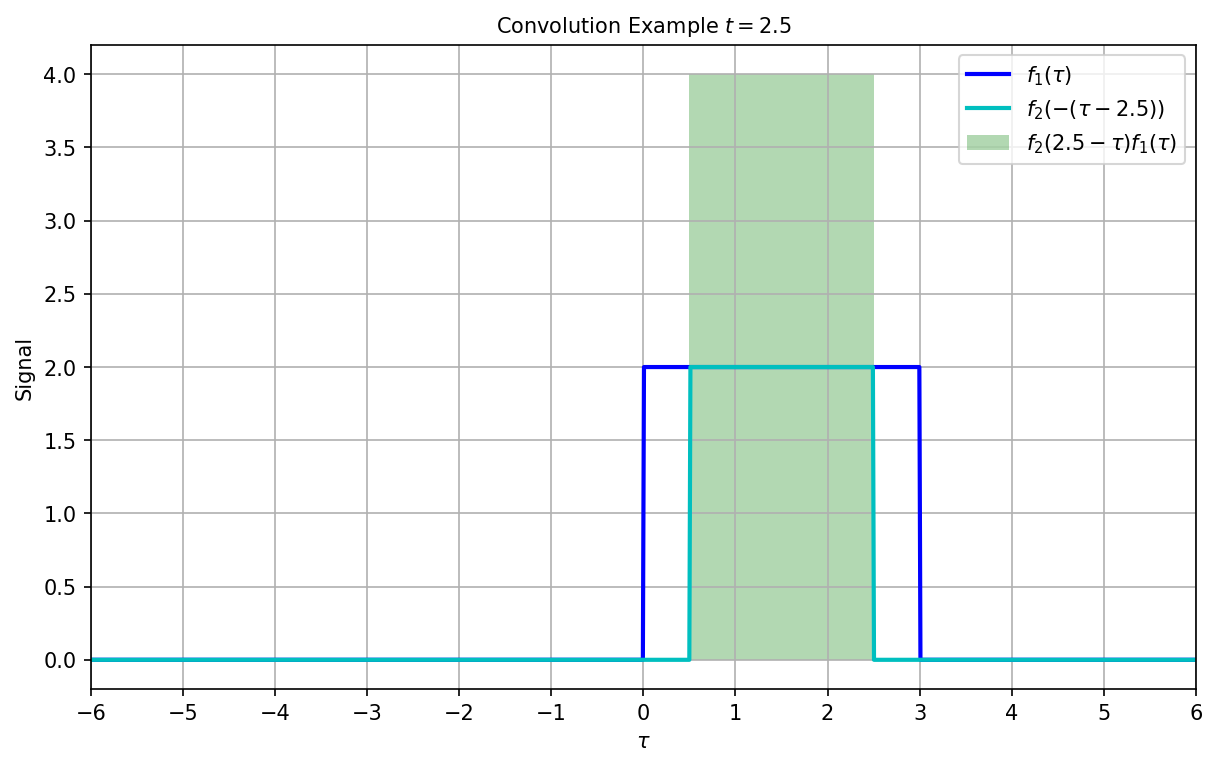

In [9]:
tval = f1min + f2max + 0.5
fig = plt.figure(3,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Passing out on the right

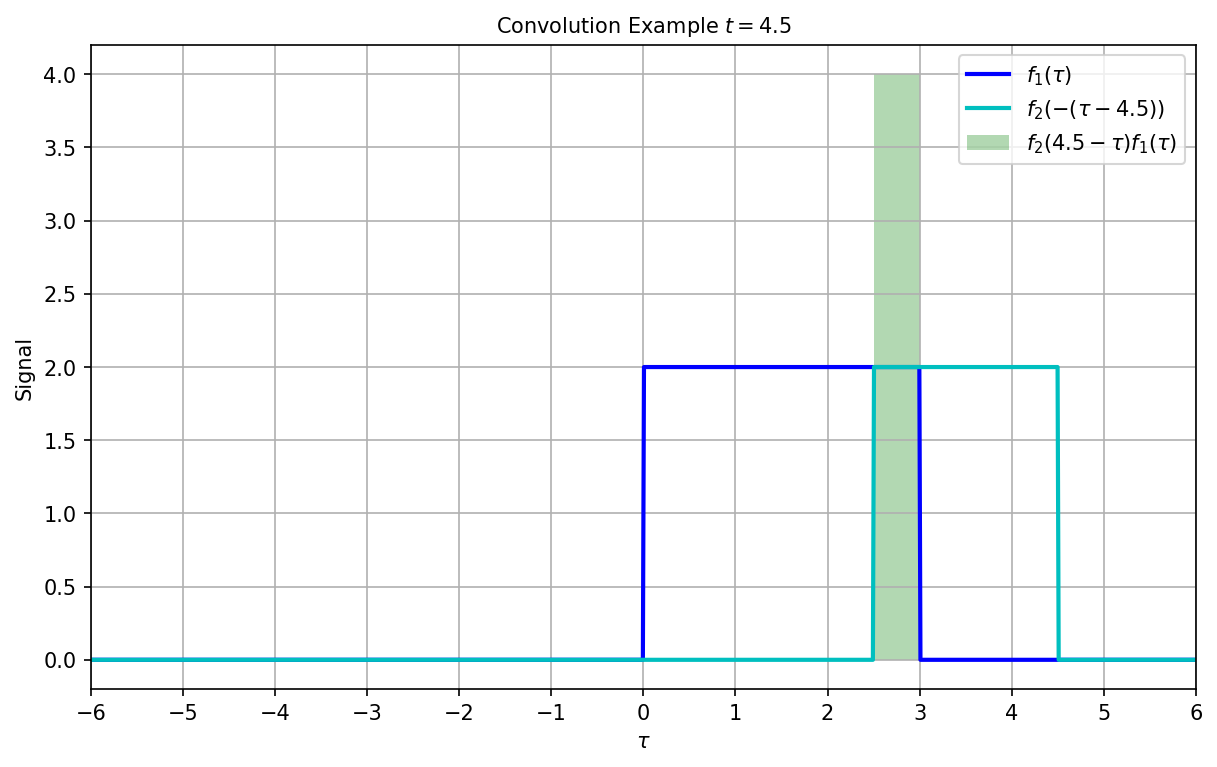

In [10]:
tval = f1max + f2max - 0.5
fig = plt.figure(4,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

## Final Result

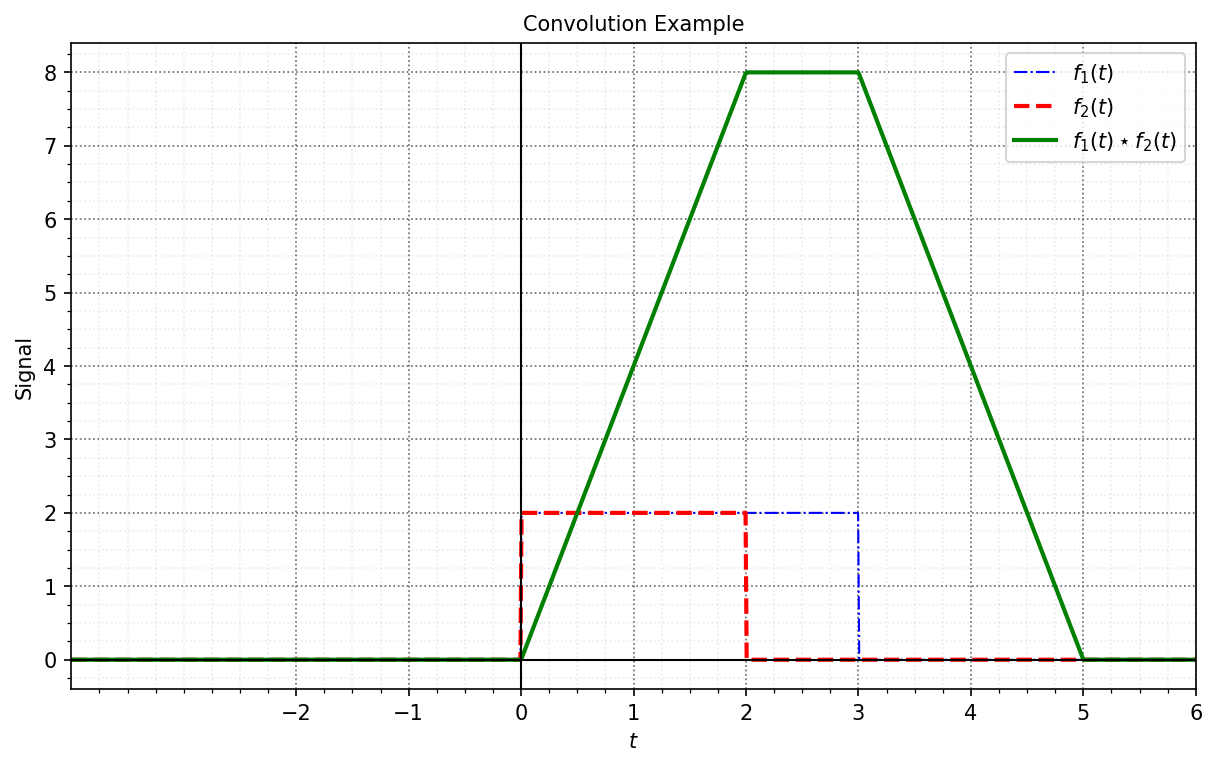

In [11]:
fig,ax = plt.subplots(1,figsize=(8, 5),constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
nicegrid(ax)
plt.xticks(np.arange(-2,6+1,1))
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

## Further Convolution Examples -- Negative function values

In [12]:
if 1: # Example 2
    f1 = Piecewise((0, t < -1),(1, t <= 0),(-1, t <= 1),(0, True))
    f2 = Piecewise((0, t < 0),(2, t <= 2),(0, True))
    f3 = convolve(f1, f2, t)
    f3amp = f1amp*f2amp
else: # Example 3
    f1 = Piecewise((0, t < 1),(2, t <= 2),(0, True))
    f2 = Piecewise((0, t < 1),(-2, t <= 2),(0, True))
    f3 = convolve(f1, f2, t)
    f3amp = f1amp*f2amp


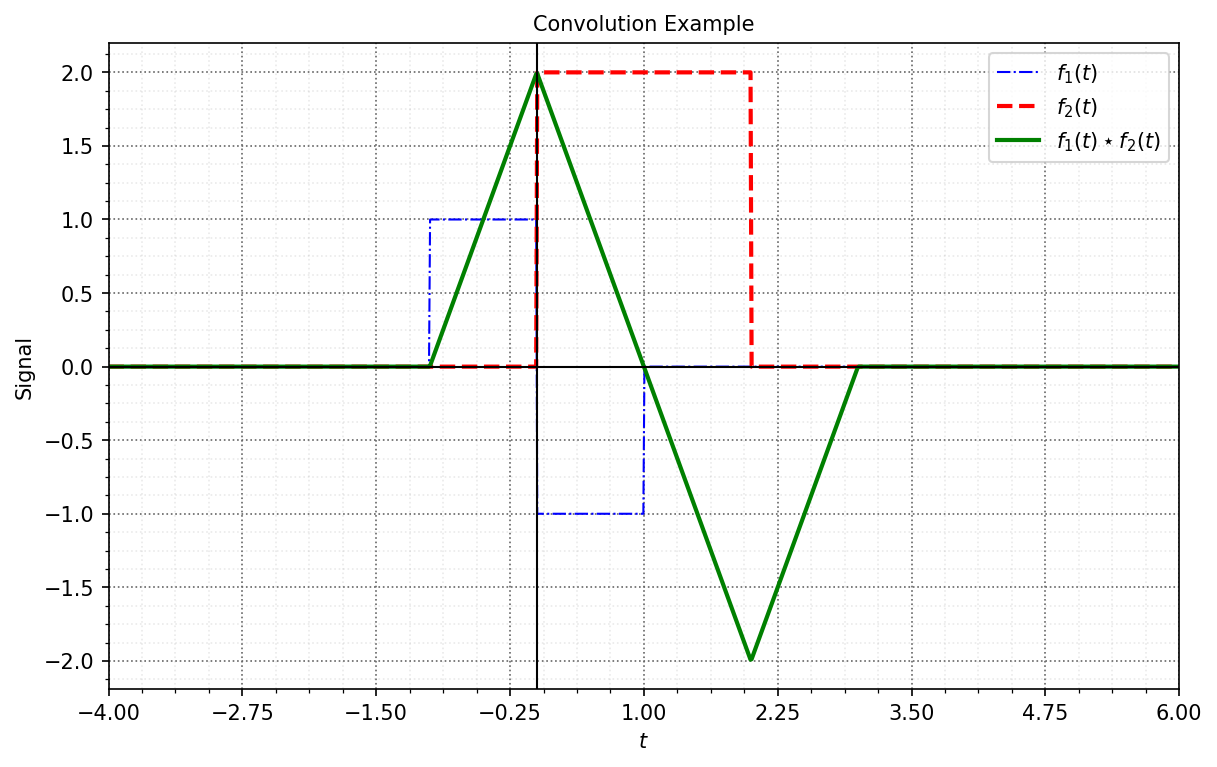

In [13]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

fig,ax = plt.subplots(1,figsize=(8, 5),constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
nicegrid(ax)
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

# Continuous Examples

In [14]:
# plotting time period
NN = 1000
ts = Symbol('t')
umin = 0
umax = 2.5
u_amp = 1.5

tt = np.linspace(-4,10, NN)
tau_vals = linspace(-10, 10, 1000)

u = u_amp*(Heaviside(ts - umin) - Heaviside(ts - umax))
g = 2*exp(-ts)*Heaviside(ts)
f3 = convolve(u, g, ts, 0 ,ts)

#modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
modules = ['numpy']

lam_u = lambdify(ts, u, modules=modules)
lam_g = lambdify(ts, g, modules=modules)
lam_f3 = lambdify(ts, simplify(f3), modules=modules)

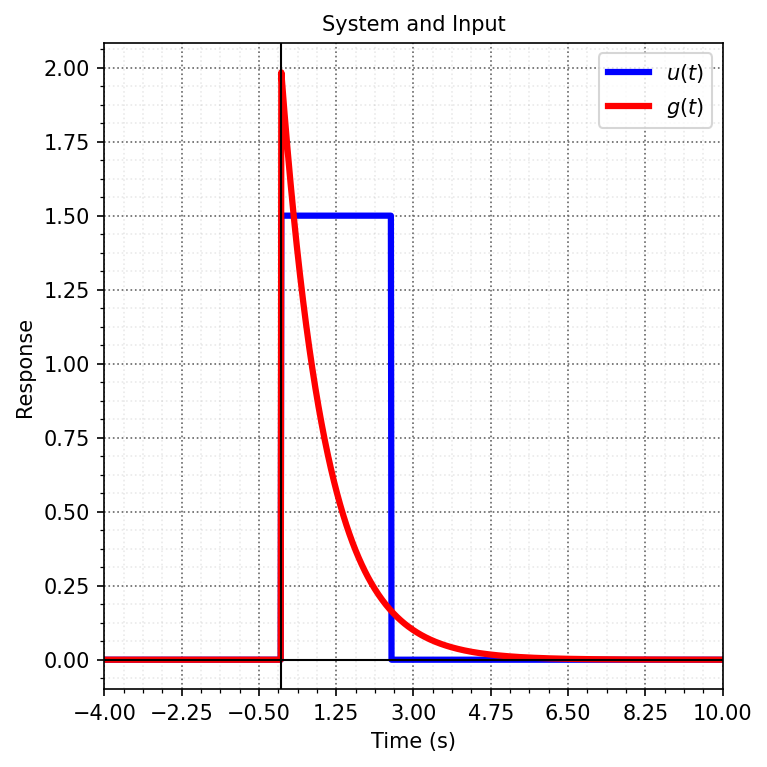

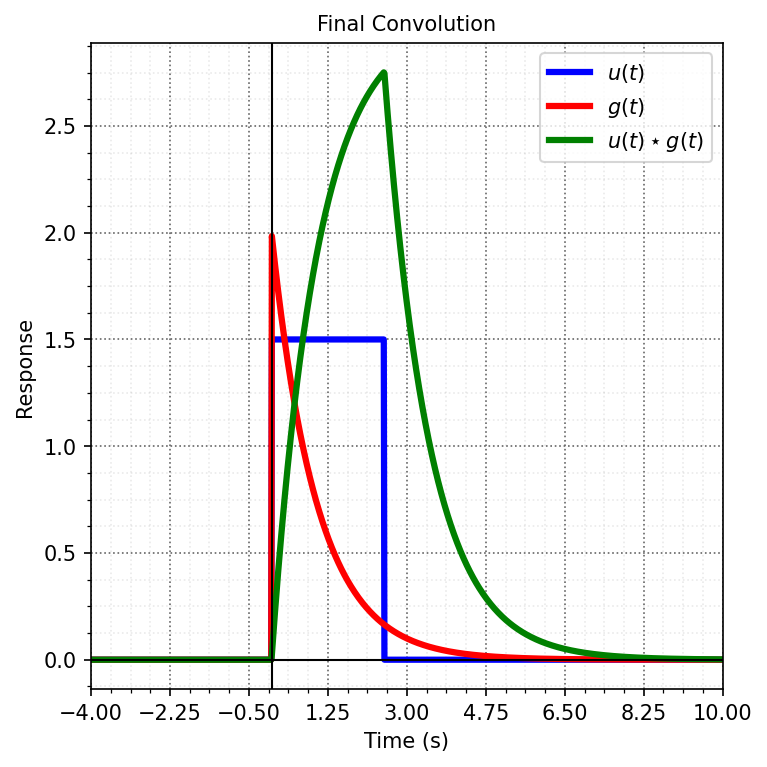

In [15]:
fig,ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_u(tt),'b-',linewidth=3,label='$u(t)$')
plt.plot(tt, lam_g(tt),'r-',linewidth=3,label='$g(t)$')

nicegrid(ax)
plt.legend()
plt.xlim(min(tt),max(tt))
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('System and Input')
savefig('./figs/Conv10.pdf')
plt.show()

fig,ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_u(tt),'b-',linewidth=3,label='$u(t)$')
plt.plot(tt, lam_g(tt),'r-',linewidth=3,label='$g(t)$')
plt.plot(tt, lam_f3(tt),'g',linewidth=3,label='$u(t)\star g(t)$')

nicegrid(ax)
plt.legend()
plt.xlim(min(tt),max(tt))
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Final Convolution')
savefig('./figs/Conv1.pdf')
plt.show()

In [16]:
def plot_functions(tval,ax):
    ax.plot(tau_vals, lam_u(tau_vals),'b-',lw=2,label=r'$u(\tau)$')
    if tval < 0:
        ax.plot(tau_vals, lam_g(tval-tau_vals),'r-',label=r'$g(-(\tau+'+str(-tval)+'))$')
    else:
        ax.plot(tau_vals, lam_g(tval-tau_vals),'r-',label=r'$g(-(\tau-'+str(tval)+'))$')
    if (tval >= umin):
        x = np.arange(umin,min(tval,umax),1/100)
        y = u_amp*lam_g(tval-x)
        ax.fill_between(x,y,color='g',alpha=0.3)
        
    nicegrid(ax)
    ax.legend(fontsize="6",loc=2)
    ax.set_xlim((-4,4))
    ax.set_ylim((0,3))
    ax.set_xticks(np.arange(-4,4,1))
    ax.set_ylabel("Signal")
    ax.set_xlabel(r"$\tau$")
    ax.set_title('Convolution Example $t = $'+str(tval))

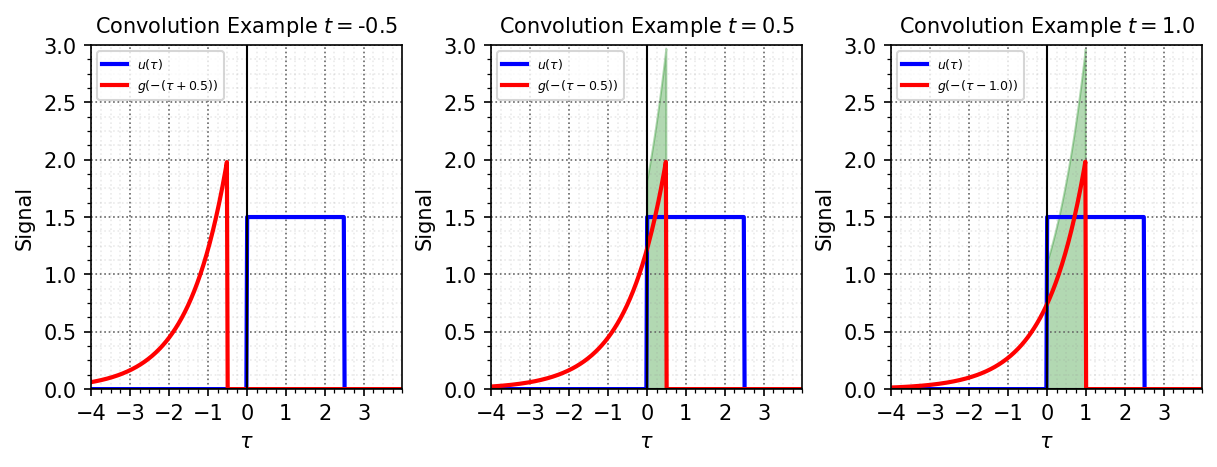

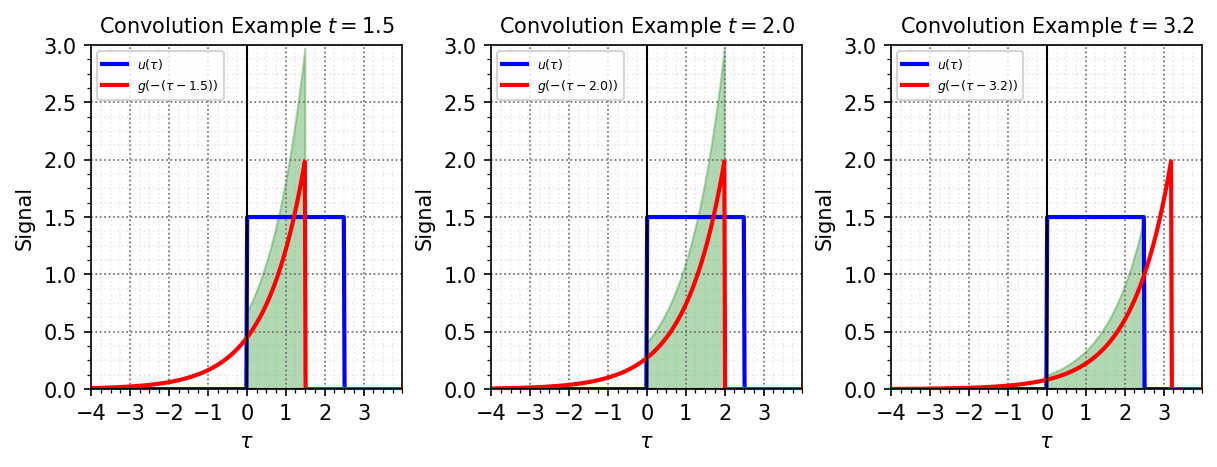

In [17]:
fig, ax = plt.subplots(1,3,figsize=(8, 3),dpi=150,constrained_layout = True)
for kk,tval in enumerate(np.array([-0.5,0.5,1])):
    plot_functions(tval,ax[kk])
savefig('./figs/Conv1a.pdf')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(8, 3),dpi=150,constrained_layout = True)
for kk,tval in enumerate(np.array([1.5,2,3.2])):
    plot_functions(tval,ax[kk])
savefig('./figs/Conv1b.pdf')
plt.show()